<a href="https://colab.research.google.com/github/AndrewArnett/DS-Unit-1-Build/blob/master/Ramen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
uploaded = files.upload()

Saving datasets_9366_13206_ramen-ratings.csv to datasets_9366_13206_ramen-ratings.csv


In [5]:
#loading dataset
df = pd.read_csv(io.StringIO(uploaded['datasets_9366_13206_ramen-ratings.csv'].decode('utf-8')))

print(df.shape)
df.head()

(2580, 7)


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [22]:
#reshaping df to just the columns I want to work with
rating = df.drop(['Review #', 'Brand', 'Variety', 'Style', 'Top Ten'], axis=1)

rating.head()

,Country,Stars
0,Japan,3.75
1,Taiwan,1
2,USA,2.25
3,Taiwan,2.75
4,India,3.75


In [23]:
#checking to make sure every value is able to be turned to a numeric value
rating['Stars'].value_counts()

4          384
5          369
3.75       350
3.5        326
3          173
3.25       170
4.25       143
4.5        132
2.75        85
2           68
2.5         67
4.75        64
1.5         37
1.75        27
1           26
0           26
2.25        21
0.5         14
0.25        11
1.25        10
5.0         10
3.50         9
5.00         7
4.00         6
4.3          4
4.50         3
3.8          3
Unrated      3
4.0          3
1.1          2
3.0          2
2.3          2
2.9          2
4.125        2
3.1          2
2.8          2
3.7          1
1.8          1
0.1          1
3.2          1
3.6          1
3.65         1
0.9          1
3.125        1
2.125        1
3.4          1
3.3          1
3.00         1
2.85         1
2.1          1
0.75         1
Name: Stars, dtype: int64

In [24]:
#changing "unrated" to a value that can be turned into a numeric value
df1 = rating.replace({'Unrated': np.NaN})

print(df1.shape)

(2580, 2)


In [25]:
# changing from string to float so data can be graphed
df1[['Stars']] = df1[['Stars']].apply(pd.to_numeric)

df1.dtypes

Country     object
Stars      float64
dtype: object

In [34]:
#checking which countries have more than 30 samples for my data
df1['Country'].value_counts()

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Cambodia           5
Brazil             5
Fiji               4
Holland            4
Poland             4
Finland            3
Dubai              3
Sweden             3
Sarawak            3
Ghana              2
Estonia            2
United States      1
Nigeria            1
Name: Country, dtype: int64

In [27]:
#had help creating a function to minimize repetition to find average values
ratings_df = pd.DataFrame(
    df1.groupby('Country')['Stars'].mean()
).reset_index(drop=False)

countries = ['Japan', 'USA', 'South Korea', 'Taiwan', 'Thailand', 
             'China', 'Malaysia', 'Hong Kong', 'Indonesia', 'Singapore', 
             'Vietnam', 'UK', 'Philippines', 'Canada', 'India']

ratings_df.head()

ratings_df[ratings_df['Country'].str.contains('|'.join(countries), regex=True)]

,Country,Stars
4,Canada,2.243902
5,China,3.421893
14,Hong Kong,3.801825
16,India,3.395161
17,Indonesia,4.067460
18,Japan,3.981605
19,Malaysia,4.154194
26,Philippines,3.329787
29,Singapore,4.126147
30,South Korea,3.790554


In [28]:
#saving to new variable
final = ratings_df[ratings_df['Country'].str.contains('|'.join(countries), regex=True)]

final.head()

,Country,Stars
4,Canada,2.243902
5,China,3.421893
14,Hong Kong,3.801825
16,India,3.395161
17,Indonesia,4.067460


In [ ]:
#resetting index for graph
final = final.set_index('Country')

In [80]:
#sorting values for graph
final = final.sort_values(by='Stars')

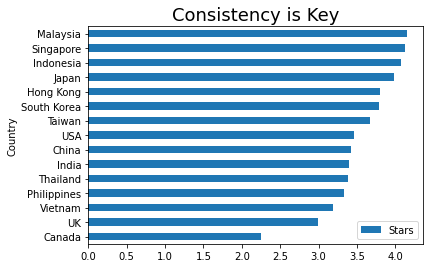

In [84]:
#graphing average rating
final.plot(kind='barh')
plt.title("Consistency is Key", fontsize=18);

In [38]:
#exploring data
crosstab = pd.crosstab(df1['Stars'], df['Country'])

crosstab

Country,Australia,Bangladesh,Brazil,Cambodia,Canada,China,Colombia,Dubai,Estonia,Fiji,Finland,Germany,Ghana,Holland,Hong Kong,Hungary,India,Indonesia,Japan,Malaysia,Mexico,Myanmar,Nepal,Netherlands,Nigeria,Pakistan,Philippines,Poland,Sarawak,Singapore,South Korea,Sweden,Taiwan,Thailand,UK,USA,United States,Vietnam
Stars,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.000,0,0,0,0,4,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,4,0,1,7,0,1
0.100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
0.250,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,2,0,0
0.500,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,1,0,0,2,1,1,0,1
0.750,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1.000,1,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,1,0,0,1,0,0,0,0,2,0,6,2,2,2,0,1
1.100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
1.250,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,1,0,3


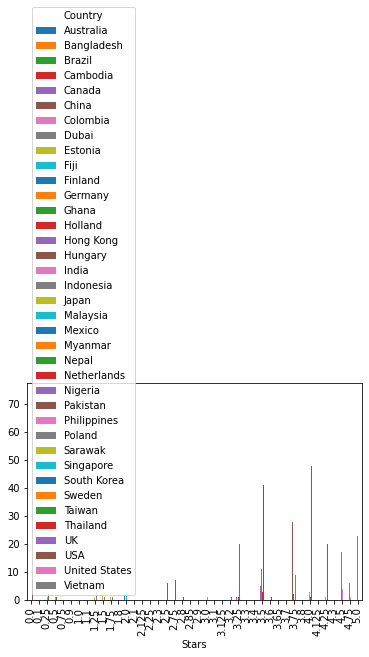

In [39]:
#exploring data
crosstab.plot(kind='bar');

In [40]:
#reshaping my df for a new 5 star total graph
names = ['Nigeria', 'United States', 'Ghana', 'Estonia', 'Dubai', 'Finland', 'Sarawak', 
         'Sweden', 'Fiji', 'Poland', 'Holland', 'Cambodia', 'Brazil', 'Colombia', 
         'Bangladesh', 'Hungary', 'Pakistan', 'Nepal', 'Myanmar', 'Netherlands', 
         'Australia', 'Mexico', 'Germany']

df_new = crosstab.drop(names, axis=1)

df_new.tail()

Country,Canada,China,Hong Kong,India,Indonesia,Japan,Malaysia,Philippines,Singapore,South Korea,Taiwan,Thailand,UK,USA,Vietnam
Stars,,,,,,,,,,,,,,,
0.00,4,6,0,0,0,1,0,0,0,2,4,0,1,7,1
0.10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
0.25,1,2,0,0,0,2,0,1,0,0,1,1,0,2,0
0.50,2,2,1,0,0,0,0,1,0,1,0,2,1,1,1
0.75,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
#creating the info to graph the 5 star amounts
higher_rankings = df_new.tail(1).T

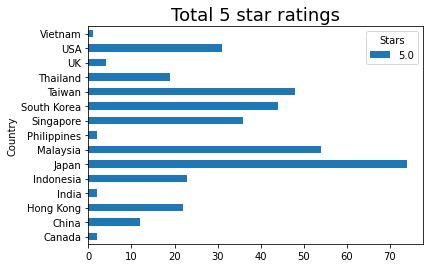

In [96]:
#graphing 5 star amounts
higher_rankings.plot(kind='barh');
plt.title('Total 5 star ratings', fontsize=18);

In [44]:
#checking values for my pie chart
df['Style']. value_counts()

Pack    1531
Bowl     481
Cup      450
Tray     108
Box        6
Bar        1
Can        1
Name: Style, dtype: int64

In [45]:
#making my lists to graph
style = ['Pack', 'Bowl', 'Cup', 'Tray', 'Other']
quantity = [1531, 481, 450, 108, 8]

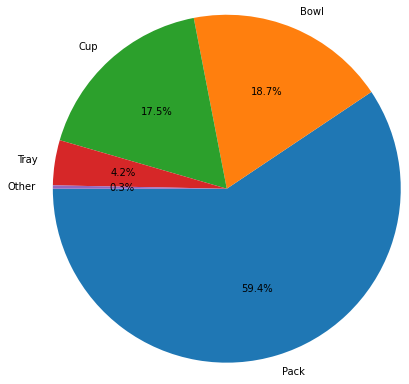

In [46]:
#graphing the style column of my df
plt.pie(quantity, labels=style, radius=2,autopct="%0.1f%%",startangle=180);

Where is the best Ramen?  The first place that popped into my head? Japan.  Several people I talked with had the same inclination.  The data I am about to show you will prove this to only be somewhat true.  While you may find the highest quantity of top rated ramen in the world to be in Japan, the most consistent seems to suprisingly be Malaysia. Side note, don't ever eat ramen in Canada.  Malaysia, Singapore, Indonesia only countries to average 4+ on a star rating of 0-5. While Japan, Malaysia and Taiwan all had 45+ 5 star rated ramens.


start blog with interesting anectode or fact: Life is hard and Winter is cold, but there is always Ramen.

A monk walks up to a ramen stand and says:
A monk walks up to a ramen stand and says: ‘make me one with everything’

Why did the ramen get arrested when he went outside without putting on his bowl?
Public Noodlity.